# Define scene collections

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# - - - - - - - - - - - - - - - - - - - - 
# DEFAULT IMPORTS - IN ALL NOTEBOKS
from src import configs

prjconf = configs.ProjectConfigParser()

# - - - - - - - - - - - - - - - - - - - - 
# NOTEBOOK SPECIFIC IMPORTS
import numpy as np
from pathlib import Path
import pandas as pd
import rasterio
from tqdm import tqdm 

import nasa_hls

## Select scenes for a scene collection

### Create dataframe with all scenes

In [2]:
product = "L30"
tile = "32UNU"
year = 2018
max_cloudcover = 75 # used later

scenedirs = list(prjconf.get_path("Interim", "hls").glob(f"*.{product}.T{tile}.{year}*"))
scenelist = pd.DataFrame(scenedirs, columns=["sdir"])
scenelist["sid"] = scenelist["sdir"].apply(lambda x: Path(x).stem)
scenelist = pd.concat([scenelist,
                       scenelist["sid"].str.split(".", expand=True) \
                       .loc[:, [1, 2, 3]] \
                       .rename({1: "product", 2: "tile", 3: "date_Yj"}, axis=1)], axis=1)
scenelist["date"] = pd.to_datetime(scenelist["date_Yj"], format="%Y%j")

In [3]:
cc = []
for i, row in tqdm(scenelist.iterrows(), total=scenelist.shape[0]):
    hdf_path = prjconf.get_scene_hdf(date=row["date_Yj"], tile="32UNU", product="L30")
    cc.append(nasa_hls.get_cloud_coverage_from_hdf(hdf_path))
scenelist["cloud_cover"] = cc

display(scenelist.head())

100%|██████████| 67/67 [00:02<00:00, 29.56it/s]


,sdir,sid,product,tile,date_Yj,date,cloud_cover
0,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018355.v1,L30,T32UNU,2018355,2018-12-21,100.0
1,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018012.v1,L30,T32UNU,2018012,2018-01-12,86.0
2,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018204.v1,L30,T32UNU,2018204,2018-07-23,84.0
3,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018028.v1,L30,T32UNU,2018028,2018-01-28,100.0
4,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018300.v1,L30,T32UNU,2018300,2018-10-27,100.0


### Create dataframe with cloud cover < 75 % scenes

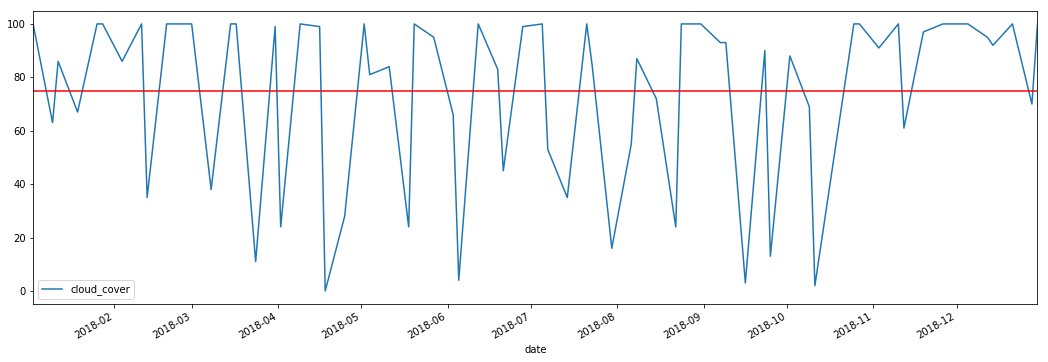

In [4]:
ax = scenelist.plot(x="date", y="cloud_cover", figsize=(18, 6))
ax.axhline(y=75, color='r')

In [5]:
scenecollection = scenelist[scenelist.cloud_cover < max_cloudcover].reset_index(drop=True)

Write a scene collection.

Note that for your own safety this throws an error if it exists.

In [6]:
scenecoll_name = f"scenecoll_{tile}_{year}_{product}_{max_cloudcover}"
prjconf.write_scene_collection(scenecollection, scenecoll_name)

 Scene collection written to /home/ben/Devel/Projects/classify-hls/data/interim/scene_collections/scenecoll_32UNU_2018_L30_75.csv


And then you can read it simply by the name itself.

In [7]:
prjconf.read_scene_collection(scenecoll_name)

,sdir,sid,product,tile,date_Yj,date,cloud_cover
0,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018108.v1,L30,T32UNU,2018108,2018-04-18,0.0
1,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018115.v1,L30,T32UNU,2018115,2018-04-25,28.0
2,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018019.v1,L30,T32UNU,2018019,2018-01-19,67.0
3,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018154.v1,L30,T32UNU,2018154,2018-06-03,66.0
4,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018044.v1,L30,T32UNU,2018044,2018-02-13,35.0
5,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018172.v1,L30,T32UNU,2018172,2018-06-21,45.0
6,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018282.v1,L30,T32UNU,2018282,2018-10-09,69.0
7,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018362.v1,L30,T32UNU,2018362,2018-12-28,70.0
8,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018284.v1,L30,T32UNU,2018284,2018-10-11,2.0
9,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018010.v1,L30,T32UNU,2018010,2018-01-10,63.0


And to get all names of stored scene collections: 

In [11]:
prjconf.get_scene_collection_names()

['scenecoll_32UNU_2018_L30_75']